In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
store = pd.read_csv('../data/store.csv')
submission = pd.read_csv('../data/sample_submission.csv')

print('train set shape:', train.shape)
print('test set shape:', test.shape)
print('store set shape:', store.shape)

train set shape: (1017209, 9)
test set shape: (41088, 8)
store set shape: (1115, 10)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [8]:
store.isna().any()

Store                        False
StoreType                    False
Assortment                   False
CompetitionDistance           True
CompetitionOpenSinceMonth     True
CompetitionOpenSinceYear      True
Promo2                       False
Promo2SinceWeek               True
Promo2SinceYear               True
PromoInterval                 True
dtype: bool

In [9]:
# train=train[train['Open']==1]

In [10]:
# test=test[test['Open']==1]

In [11]:
def dateExplode(df,column):
    try:
        df['Year'] = pd.DatetimeIndex(df[column]).year
        df['Month'] = pd.DatetimeIndex(df[column]).month
        df['Day'] = pd.DatetimeIndex(df[column]).day  
    except KeyError:
        print("Column couldn't be found")
        return
    return df  

In [12]:
train_dates=dateExplode(train,"Date")
train_dates.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31


In [13]:
test_dates=dateExplode(test,"Date")
test_dates.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,1,4,2015-09-17,1.0,1,0,0,2015,9,17
1,2,3,4,2015-09-17,1.0,1,0,0,2015,9,17
2,3,7,4,2015-09-17,1.0,1,0,0,2015,9,17
3,4,8,4,2015-09-17,1.0,1,0,0,2015,9,17
4,5,9,4,2015-09-17,1.0,1,0,0,2015,9,17


In [14]:
def drawLinePlot(df1,group,column,title):

    axis = df1.groupby(group)[[column]].mean().plot(figsize = (12,5),color = 'r' , marker = 'o')
    axis.set_title(f'Average {column} per {group}')
    plt.figure()    

In [15]:

def bar_plot(df1,df2,name1,name2,column):
    fig, axs = plt.subplots(1,2,figsize=(20,5))
    fig.suptitle(f'{column} Column Distribution')
    sns.countplot(x=column, data=df1,ax=axs[0]).set_title(f'{name1} Set')
    
    sns.countplot(x=column, data=df2,ax=axs[1]).set_title(f'{name2} Set')

Check for seasonality in both training and test sets - are the seasons similar between these two groups?


The Monthly count distribution of data points. We can see that we only have in the test set two months 8 and 9

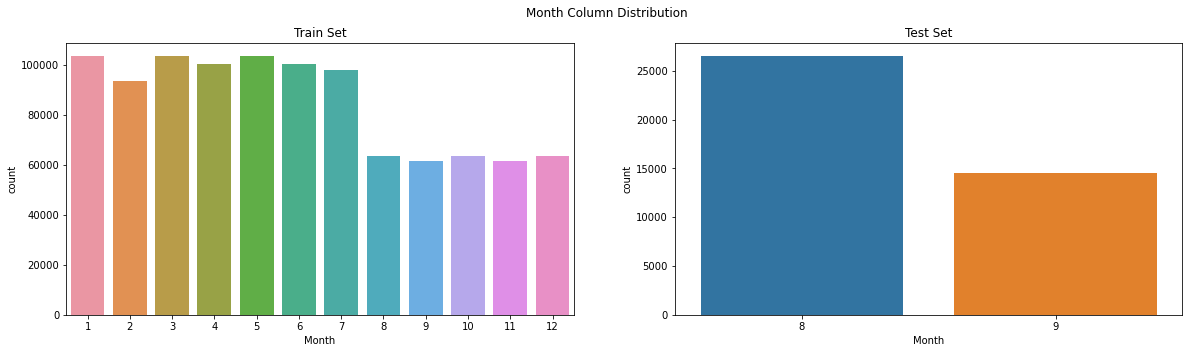

In [16]:
bar_plot(train_dates,test_dates,"Train","Test","Month")

Promotion accross the months. It shows we have the lowest in december. 

Text(0.5, 0.98, 'Average promo per month')

<Figure size 720x504 with 0 Axes>

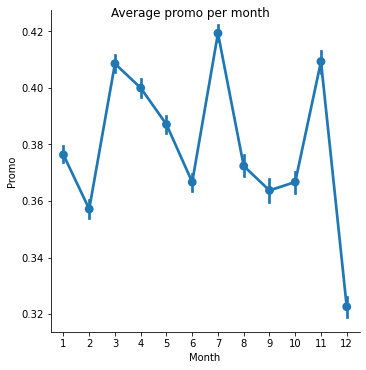

In [18]:
plt.figure(figsize=(10, 7))
sns.factorplot(data = train, x ="Month", y = "Promo").fig.suptitle("Average promo per month")

Promo accross the months in our train set. 

Text(0.5, 0.98, 'Average promo per month')

<Figure size 720x504 with 0 Axes>

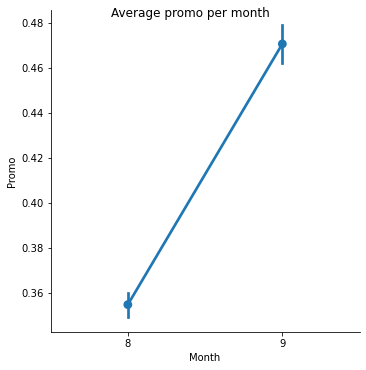

In [20]:
plt.figure(figsize=(10, 7))
sns.factorplot(data = test, x ="Month", y = "Promo").fig.suptitle("Average promo per month")

The average sales per day of the month. We can see that the end of the month has a very high sale 

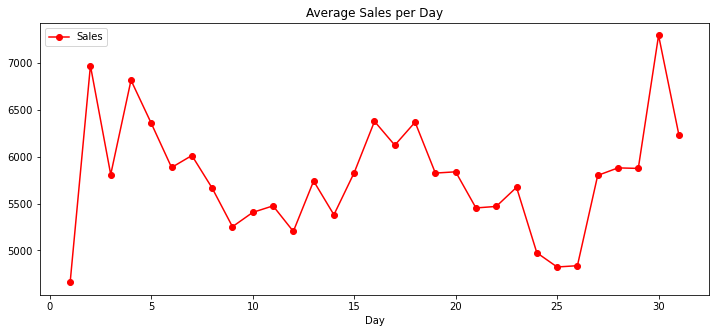

<Figure size 1440x720 with 0 Axes>

In [ ]:
drawLinePlot(train,"Day","Sales","")

Average sales per month. We can see a sharp increase in the last two months of the year. Possibly explained by the increase in sales brought on by chrismass season. 

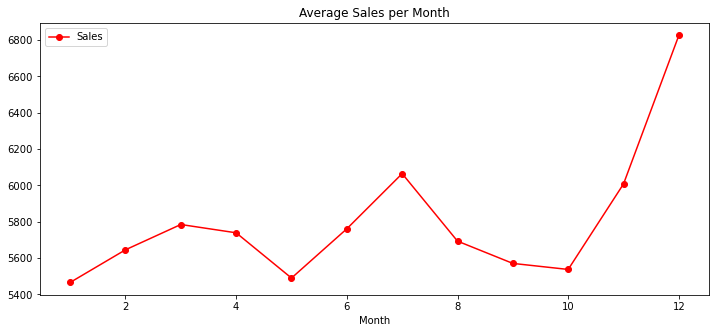

<Figure size 1440x720 with 0 Axes>

In [ ]:
drawLinePlot(train,"Month","Sales","")

A yearly average showing we have increasing average sales year after year. But growth in sales might be slowing down. More data to make conclusive remarks on trend

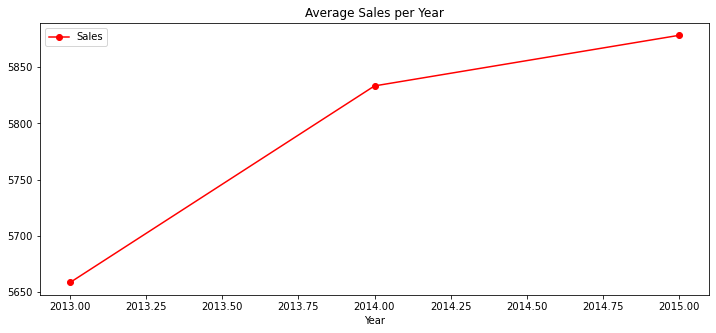

<Figure size 1440x720 with 0 Axes>

In [ ]:
drawLinePlot(train,"Year","Sales","")

The yearly pattern of our data. Showing trends, seasonality, residuals for our sales data. We can see patterns in our trends. We can see similar peaks and dips in our data across the years

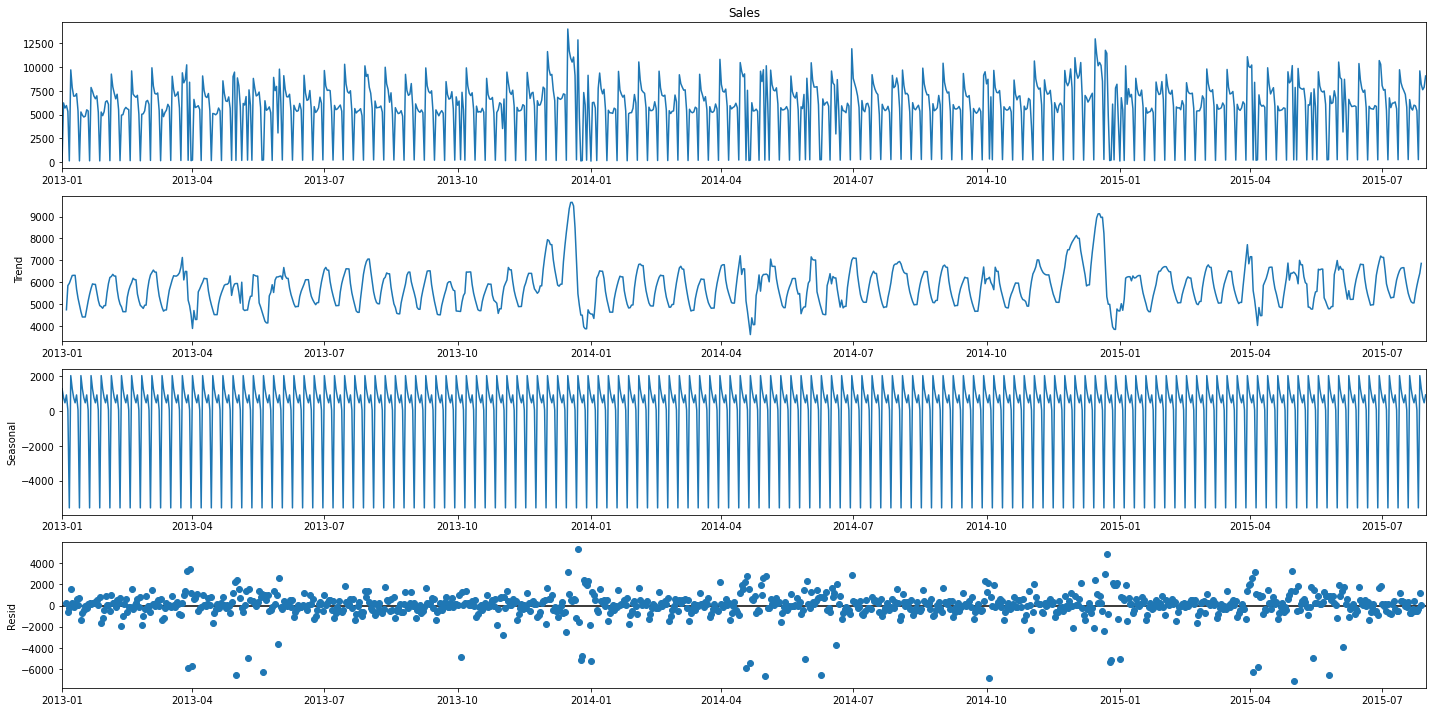

In [ ]:
import statsmodels.api as sm

plt.rcParams["figure.figsize"] = (20,10)
train_copy=train.copy()

train_copy["Date"]=pd.to_datetime(train["Date"])
train_copy=train_copy.groupby('Date')['Sales'].mean()

decomposition = sm.tsa.seasonal_decompose(train_copy, model='additive')
fig = decomposition.plot()
plt.show()

Find out any seasonal (Christmas, Easter etc) purchase behaviours,

In [21]:
train["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [22]:
train.loc[train["StateHoliday"]==0,"StateHoliday"]="0"

In [23]:
train["StateHoliday"].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [24]:
train["SchoolHoliday"].unique()

array([1, 0], dtype=int64)

In [ ]:
# train_copy=train.copy()
# g = sns.lmplot(x="Sales", y="Date", hue="StateHoliday",
#                truncate=True, size=10, data=train)
               

# # plt.xticks(rotation='vertical')
# plt.title(' Comparing Car Make prices over the years')

In [ ]:
# axis = train.groupby('Date')[['Sales']].mean().plot(figsize = (12,20),color = 'r' , marker = 'o')
# axis.set_title('Average sales per month')
# plt.figure()

Holiday count plot showing the distribution of the different holidays accross our data. We can see that our data is mostly non holiday. 

<AxesSubplot:xlabel='StateHoliday'>

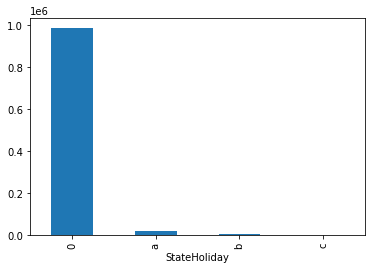

In [25]:
train.groupby("StateHoliday")["Open"].count().plot.bar()

Analysis of our school holidays. We can see that it is a yes or no graph with more days in our non school holiday

<AxesSubplot:xlabel='SchoolHoliday'>

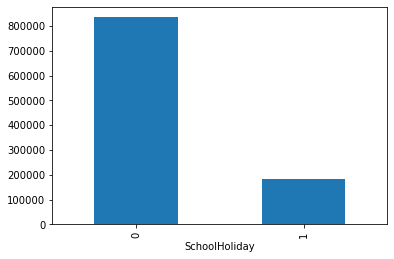

In [ ]:
train.groupby("SchoolHoliday")["Open"].count().plot.bar()

In [ ]:
dates=train[train["StateHoliday"]!="0"]["Date"].unique()

In [ ]:
dates

array(['2015-06-04', '2015-05-25', '2015-05-14', '2015-05-01',
       '2015-04-06', '2015-04-03', '2015-01-06', '2015-01-01',
       '2014-12-26', '2014-12-25', '2014-11-19', '2014-11-01',
       '2014-10-31', '2014-10-03', '2014-06-19', '2014-06-09',
       '2014-05-29', '2014-05-01', '2014-04-21', '2014-04-18',
       '2014-01-06', '2014-01-01', '2013-12-26', '2013-12-25',
       '2013-11-20', '2013-11-01', '2013-10-31', '2013-10-03',
       '2013-08-15', '2013-05-30', '2013-05-20', '2013-05-09',
       '2013-05-01', '2013-04-01', '2013-03-29', '2013-01-06',
       '2013-01-01'], dtype=object)

In [26]:
christmass=train[train["StateHoliday"]=="c"]["Date"].unique()

In [27]:
christmass=pd.to_datetime(christmass)

In [28]:
train_date=train.copy()
train_date["Date"]=pd.to_datetime(train_date["Date"])
averages=train_date.sort_values("Date").groupby('Date')[['Sales','Customers']].mean()

s1 = pd.concat([averages.loc[date - pd.Timedelta(1, unit='d') : 
                      date + pd.Timedelta(30, unit='d')] for date in christmass])

s2 = pd.concat([averages.loc[date - pd.Timedelta(30, unit='d') : 
                      date - pd.Timedelta(1, unit='d') ] for date in christmass])
s3=pd.concat([averages.loc[[date]] for date in christmass])
s1["Status"]="After"
s2["Status"]="Before"
s3["Status"]="During"

Christmas sales data comparision before after and during. We can see that for the 30 days before and the 30 days after there is little difference with before taking a slight lead. Meaning more sales happen before the holiday than after

Text(0.5, 1.0, 'Sales before after and during christmas')

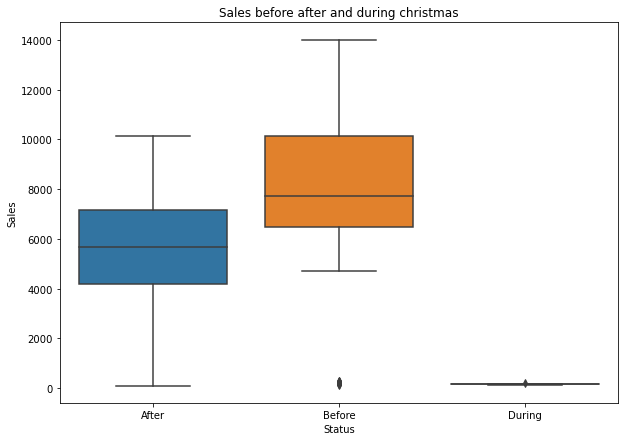

In [29]:
christmass_data=pd.concat([s1,s2,s3])

plt.figure(figsize=(10, 7))
sns.boxplot(x='Status', y='Sales', data=christmass_data).set_title("Sales before after and during christmas")

Number of customers before and after chrismass. We can see that there are more people coming on average into the shops before the holidays than after by a wide margin. 

<AxesSubplot:xlabel='Status', ylabel='Customers'>

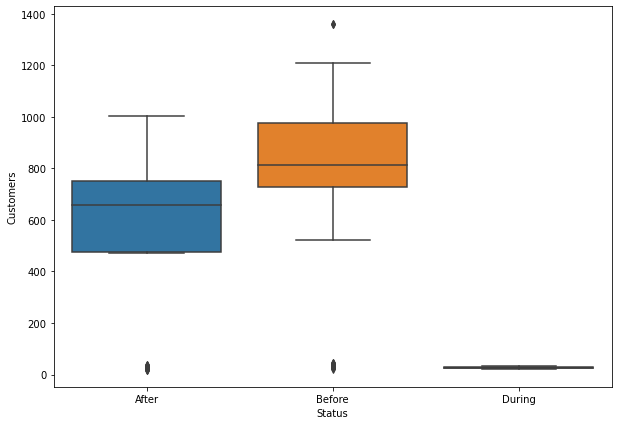

In [ ]:

plt.figure(figsize=(10, 7))
sns.boxplot(x='Status', y='Customers', data=christmass_data).set_title("Cutomers before after and during christmas")

In [30]:
easter=train[train["StateHoliday"]=="b"]["Date"].unique()

In [31]:
easter=pd.to_datetime(easter)

In [32]:
s1 = pd.concat([averages.loc[date : 
                      date + pd.Timedelta(30, unit='d')] for date in easter])

s2 = pd.concat([averages.loc[date -pd.Timedelta(30, unit='d') : 
                      date ] for date in easter])

s3=pd.concat([averages.loc[[date]] for date in easter])


In [33]:
s1["Status"]="After"
s2["Status"]="Before"
s3["Status"]="During"

Easter also shows a similar pattern with the before the holiday showing a slighter higher number of sales than after. 

Text(0.5, 1.0, 'Sales before after and during easter')

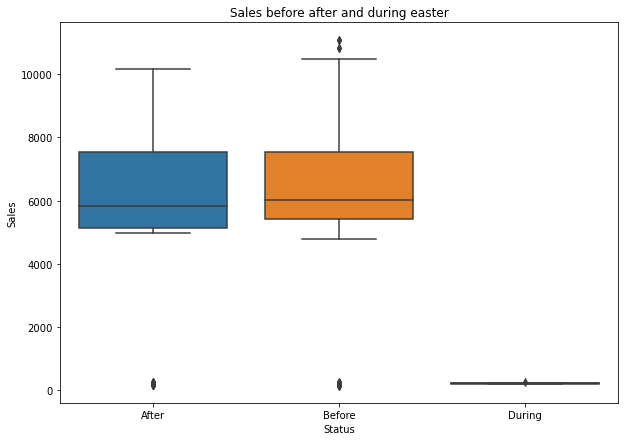

In [34]:
easter_data=pd.concat([s1,s2,s3])

plt.figure(figsize=(10, 7))
sns.boxplot(x='Status', y='Sales', data=easter_data).set_title("Sales before after and during easter")

Text(0.5, 1.0, 'Cutomers before after and during easter')

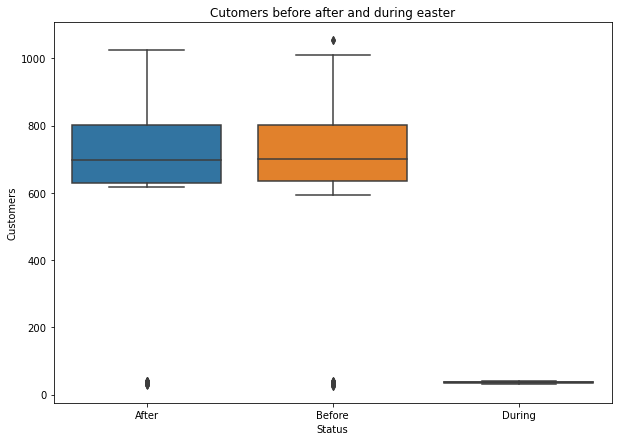

In [36]:

plt.figure(figsize=(10, 7))
sns.boxplot(x='Status', y='Customers', data=easter_data).set_title("Cutomers before after and during easter")

What can you say about the correlation between sales and number of customers?

Correlation between the number of customers and sales. We can see that they have a high correlation meaning that the number of customers increasing means an increase in sales. This means that if we can increase the foot traffic in our stores we have a good chance of also increasing our sales. 

Text(0.5, 1.0, 'Sales - Customers Relation')

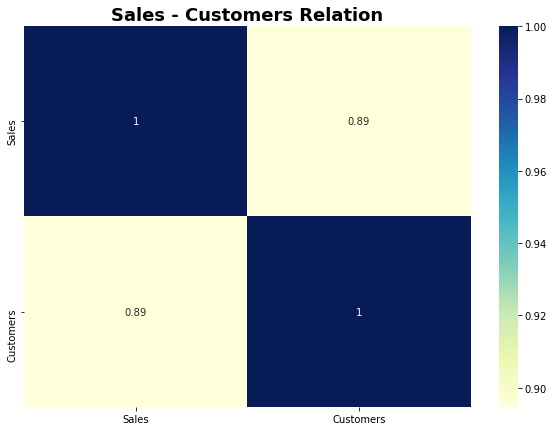

In [ ]:

plt.figure(figsize=(10, 7))
sns.heatmap(train[['Sales','Customers']].corr(method='pearson'),annot=True,  cmap="YlGnBu")
plt.title('Sales - Customers Relation', size=18, fontweight='bold')

How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?


The correlation shows that there is moderate uphill relationship. Meaning that it is only a small predictor of sales. 

Text(0.5, 1.0, 'Sales - Promotion Relation')

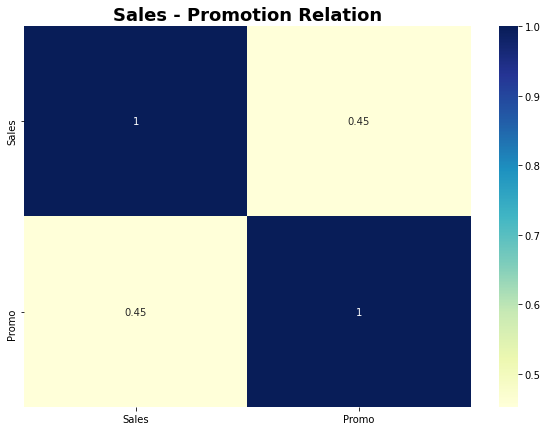

In [ ]:

plt.figure(figsize=(10, 7))
sns.heatmap(train[['Sales','Promo']].corr(method='pearson'),annot=True,  cmap="YlGnBu")
plt.title('Sales - Promotion Relation', size=18, fontweight='bold')

We can see a lift in sales between having a promotion and not having one. On average promotions have an increased sales amount. Though this doesn't indicate that promotions drive sales

Text(0.5, 1.0, 'Sales comparison with promo and without')

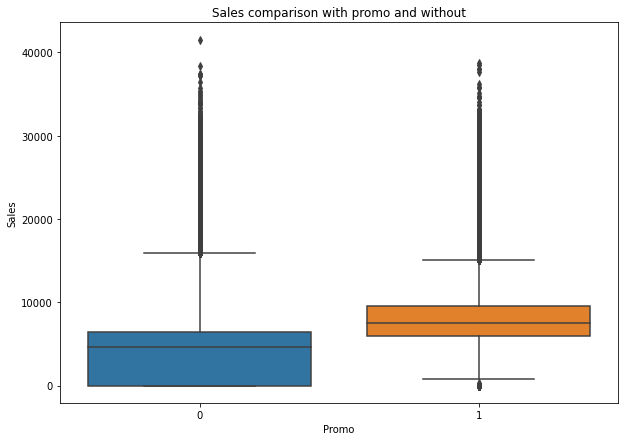

In [37]:
# train[["Sales","Promo"]].plot(kind='box')

plt.figure(figsize=(10, 7))
sns.boxplot(x='Promo', y='Sales', data=train).set_title("Sales comparison with promo and without")

Distribution of sales and promotions across the years. There is a similar trend in sales and promotion related behaviour. Where promotion based dates have on average more sales and in certain months mean a very large difference in sales(December)

Text(0.5, 0.98, 'Sales distribution across months')

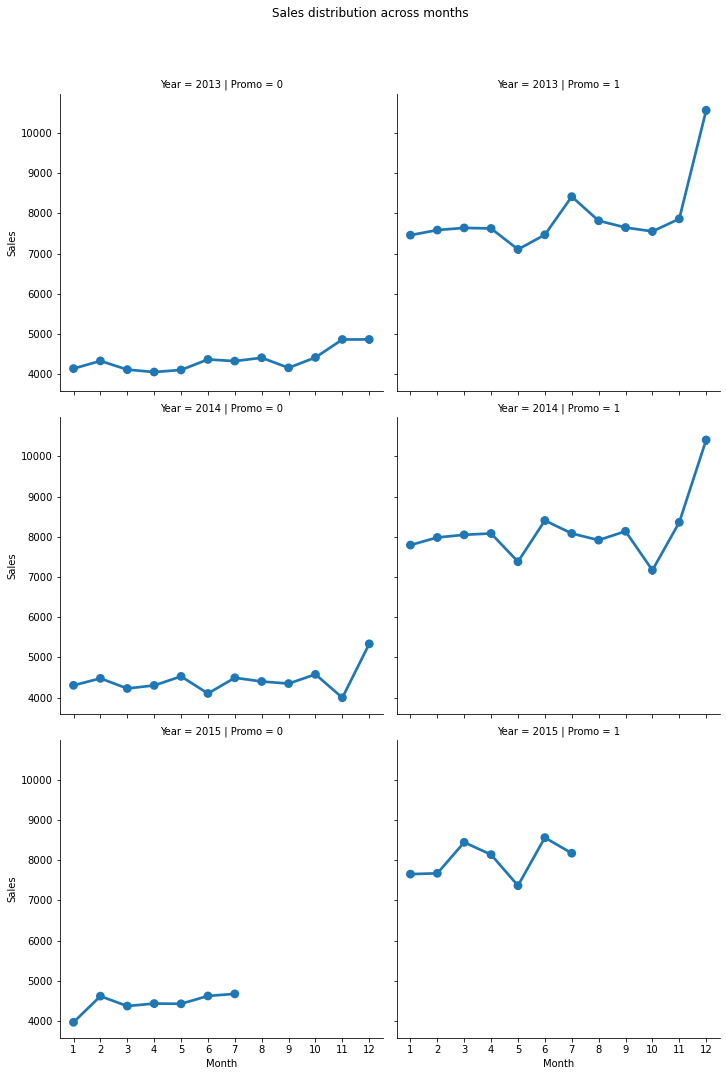

In [40]:
rg=sns.factorplot(data = train, x ="Month", y = "Sales", 
               col = 'Promo', 
               row = "Year")
               
rg.fig.subplots_adjust(top=0.9)
rg.fig.suptitle("Sales distribution across months")

The difference for customers between promotion and non promotion is a lot less meaning that it doesn't have a strong capability of attracting customers

Text(0.5, 1.0, 'Customers with and without promotion')

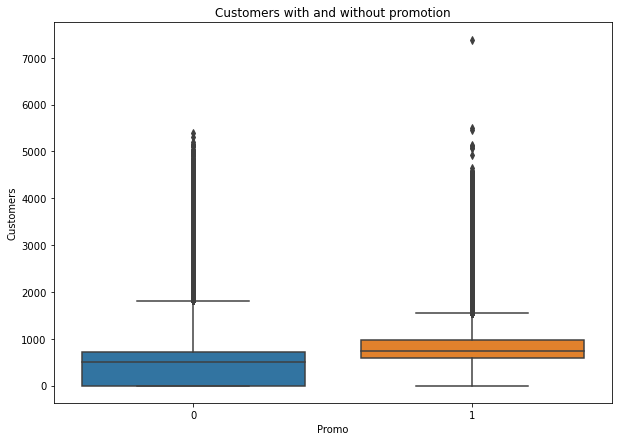

In [41]:

plt.figure(figsize=(10, 7))
sns.boxplot(x='Promo', y='Customers', data=train).set_title("Customers with and without promotion")

Distribution of sales and promotions across the years. There is a similar trend in customers and promotion related behaviour. Where promotion based dates have on average more customers and in certain months mean a very large difference in customers(December)

Text(0.5, 0.98, 'Customers across months with and without promotion')

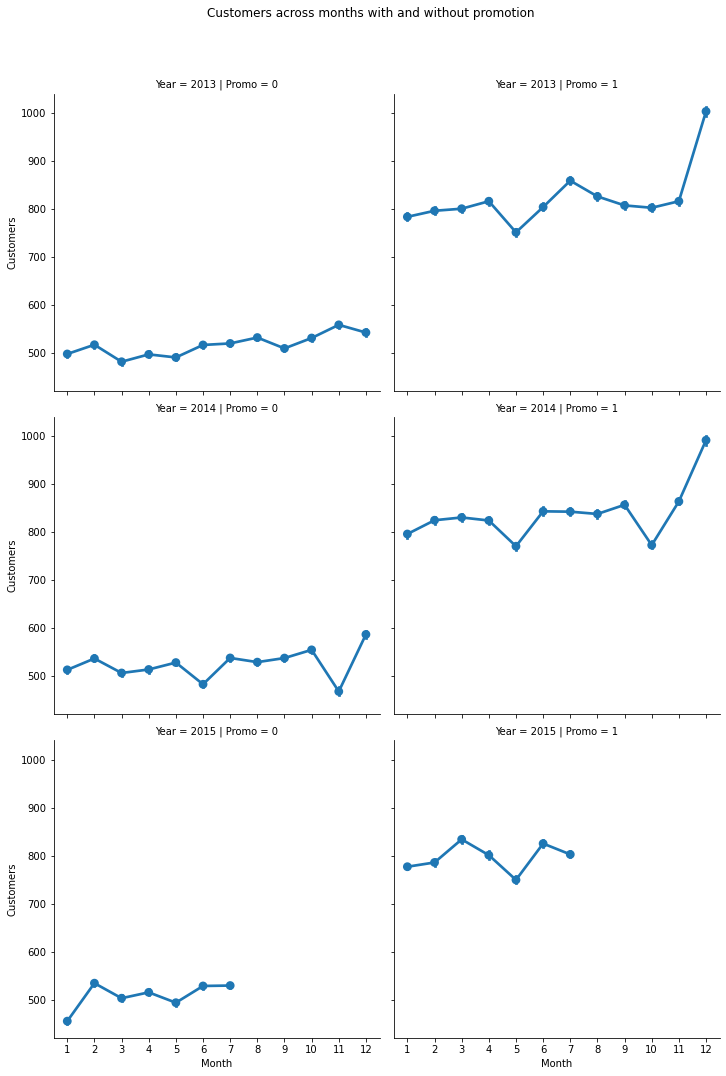

In [42]:
pl=sns.factorplot(data = train, x ="Month", y = "Customers", 
               col = 'Promo', # per store type in cols
               row = "Year")

pl.fig.subplots_adjust(top=0.9)

pl.fig.suptitle("Customers across months with and without promotion")


In [44]:
train_store = pd.merge(train, store, on=["Store"])

Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

We can see that promos have little effect on the sales of the type b stores but have overall good and similar lifts in other store types. So promos should be deployed less on store b and more on the other stores

Text(0.5, 0.98, 'Sales across Assortment types with promotion columns')

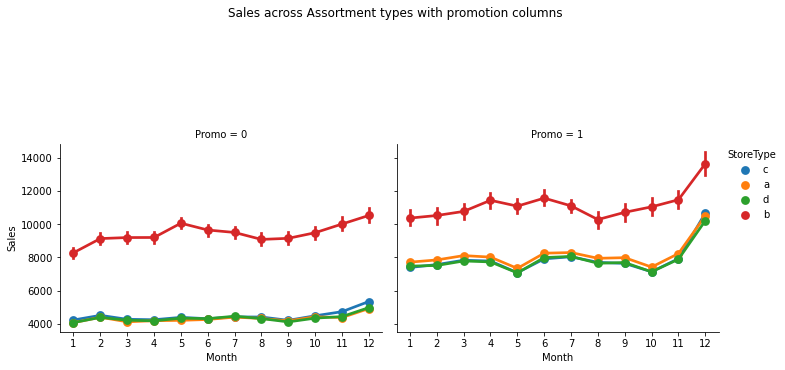

In [45]:
aso=sns.factorplot(data = train_store, x ="Month", y = "Sales", 
               col = 'Promo', 
               hue="StoreType")


aso.fig.subplots_adjust(top=0.6)
aso.fig.suptitle("Sales across Assortment types with promotion columns")

Similar to our store types stores with the assortment type of b have less difference due to promos and so should have less of them than  the other stores. 

In [46]:
pto=sns.factorplot(data = train_store, x ="Month", y = "Sales", 
               col = 'Promo', 
               hue="Assortment").set_title("Sales comparison promotion and assortment")

pto.fig.subplots_adjust(top=0.2)
pto.fig.suptitle("Sales comparison promotion and assortment")

December shows the most difference due to promos. Promos should increase during that month as it has the most impact for little promotion(seen in graphs above showing promo distribution)

,Avg Promotion Sales,Avg Non-Promotion Sales,increase percent
Month,,,
1,7637.813837,4154.433175,83.847315
2,7746.883378,4477.680801,73.011068
3,8011.451617,4246.012246,88.681783
4,7948.050722,4266.077711,86.308156
5,7276.331266,4361.203367,66.842283
6,8177.309526,4362.027708,87.465786
7,8231.498481,4500.161489,82.915624
8,7860.176928,4407.173499,78.349614
9,7893.042646,4242.340072,86.053982


<AxesSubplot:xlabel='Month', ylabel='increase percent'>

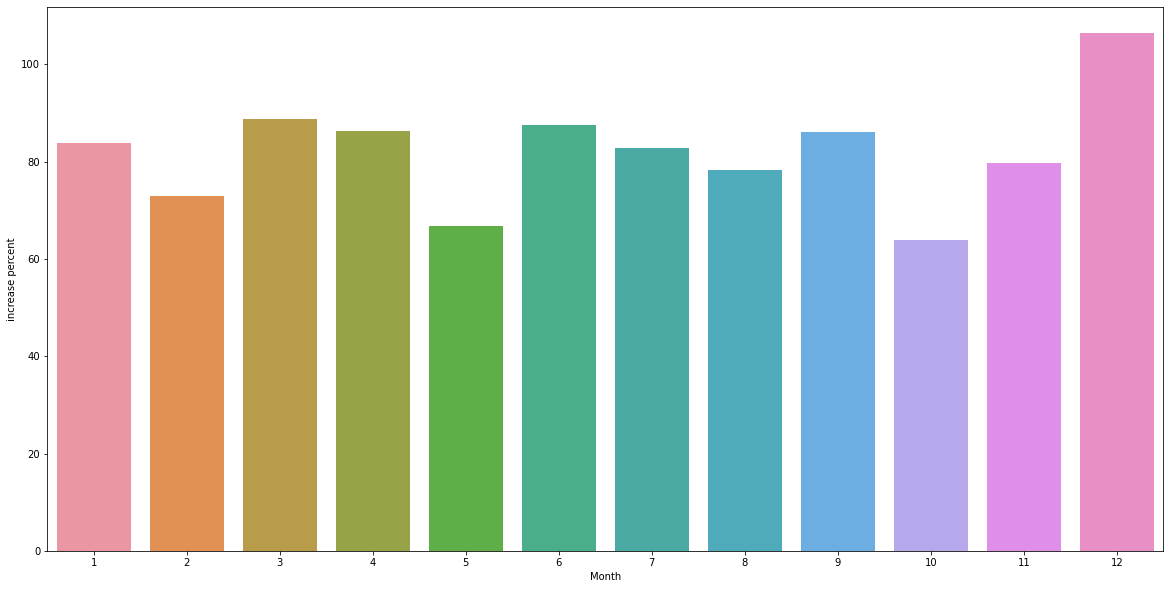

In [ ]:
promo_sales = train_store[train_store.Promo == 1]
non_promo_sales = train_store[train_store.Promo == 0]

promo_sales_agg = promo_sales.groupby("Month").agg({"Sales":  "mean"})
promo_sales_agg = promo_sales_agg.rename(columns={"Sales": "Avg Promotion Sales"})

non_promo_sales_agg = non_promo_sales.groupby("Month").agg({"Sales":  "mean"})
non_promo_sales_agg = non_promo_sales_agg.rename(columns={"Sales": "Avg Non-Promotion Sales"})


pormo_non_promo_sales_df = pd.merge(promo_sales_agg, non_promo_sales_agg, on="Month")

sales_increase_diff = pormo_non_promo_sales_df["Avg Promotion Sales"] - pormo_non_promo_sales_df["Avg Non-Promotion Sales"]

pormo_non_promo_sales_df["increase percent"] = (sales_increase_diff/pormo_non_promo_sales_df["Avg Non-Promotion Sales"]) * 100
display(pormo_non_promo_sales_df)
    
sns.barplot(x=pormo_non_promo_sales_df.index, y='increase percent', data=pormo_non_promo_sales_df).set_title("Increase in sales across months")

Trends of customer behavior during store open and closing times

In [ ]:
train[train["Open"]==0].describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day
count,172817.000000,172817.000000,172817.0,172817.0,172817.0,172817.000000,172817.000000,172817.000000,172817.000000,172817.000000
mean,558.462987,6.333769,0.0,0.0,0.0,0.064716,0.105684,2013.834027,5.851768,15.053467
std,322.771734,1.547688,0.0,0.0,0.0,0.246025,0.307434,0.778058,3.336661,9.252490
min,1.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,2013.000000,1.000000,1.000000
25%,279.000000,7.000000,0.0,0.0,0.0,0.000000,0.000000,2013.000000,3.000000,7.000000
50%,560.000000,7.000000,0.0,0.0,0.0,0.000000,0.000000,2014.000000,5.000000,15.000000
75%,839.000000,7.000000,0.0,0.0,0.0,0.000000,0.000000,2014.000000,8.000000,23.000000
max,1115.000000,7.000000,0.0,0.0,0.0,1.000000,1.000000,2015.000000,12.000000,31.000000


Promos have little effect on days where the store is closed because there are no sales. 

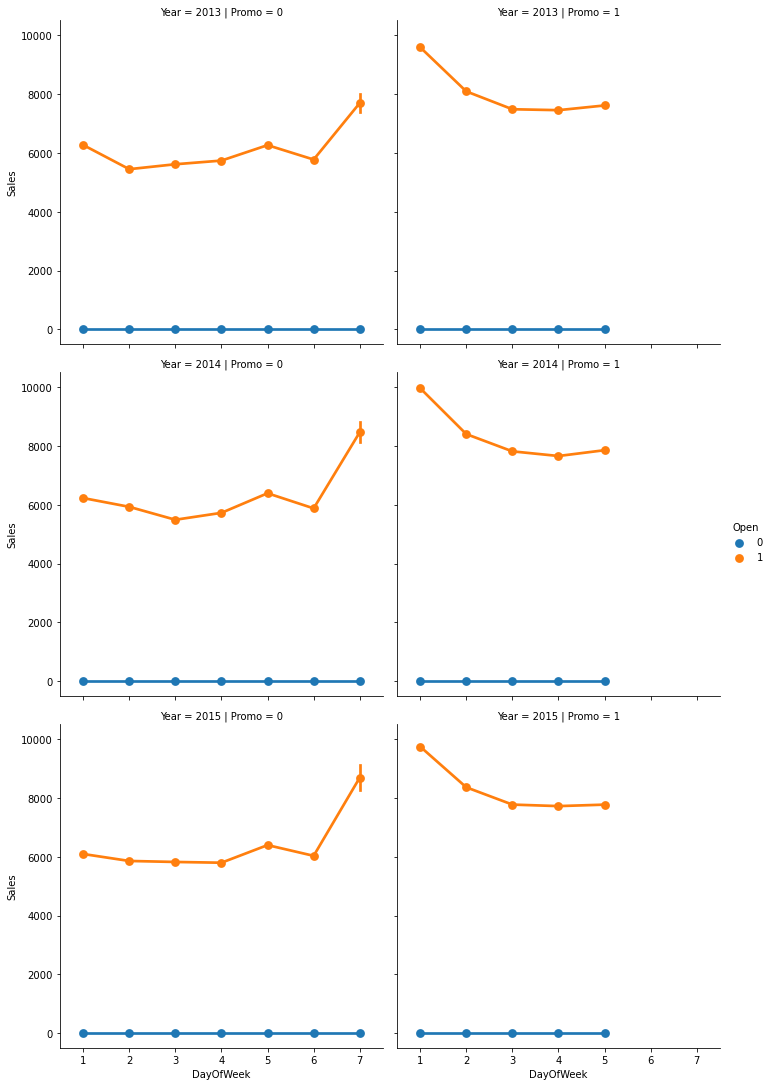

In [ ]:
sns.factorplot(data = train, x = 'DayOfWeek', y = "Sales", estimator=np.mean,
               hue = 'Open',
               col="Promo",
            #    col_order=['a', 'b', 'c', '0']
               ).set_title("Sales across days of week with promotion and without")

In [ ]:
day_sales=train.groupby(["DayOfWeek","Open"], as_index=False)

In [ ]:
day_sales

In [ ]:
# sns.lineplot(data=day_sales,x=day_sales.DayOfWeek,y=day_sales.Sales,hue=day_sales.Open)

The distribution of sales and customers across the days of the week showing very similar rates throughout with monday having the most sales

<Figure size 432x288 with 0 Axes>

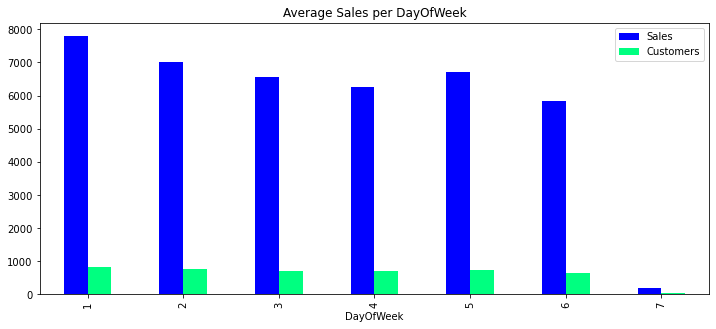

<Figure size 432x288 with 0 Axes>

In [ ]:

axis = train.groupby(["DayOfWeek"])[["Sales","Customers"]].mean().plot(figsize = (12,5),cmap="winter" ,kind='bar')
axis.set_title('Average Sales per DayOfWeek')
# axis.set_facecolor('#c1c3c3')
plt.figure()    

Most stores closed on sundays with second highest closings being on thrusdays. 

Text(0.5, 1.0, 'Day Of Week Open Count')

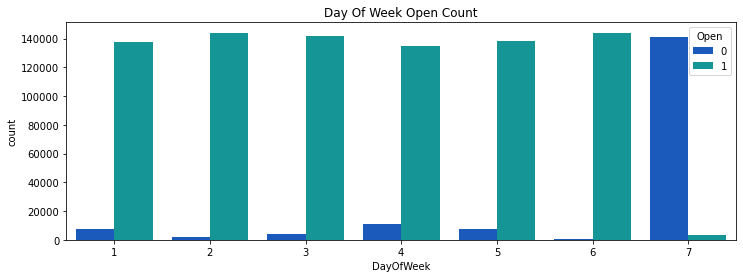

In [ ]:
fig, (axis1) = plt.subplots(1,1,figsize=(12,4))
sns.countplot(x='DayOfWeek',hue='Open', data=train, ax=axis1, palette = 'winter')
plt.title("Day Of Week Open Count")

Average sales and cutomers across the week. The number of customers changes very little throughout the week even though the sales fluctuate. 

<Figure size 432x288 with 0 Axes>

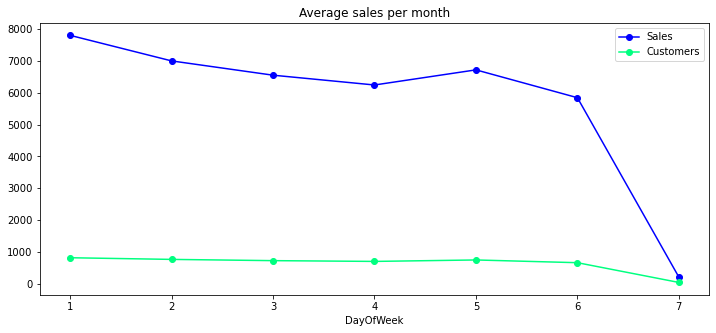

<Figure size 432x288 with 0 Axes>

In [ ]:
axis = train.groupby('DayOfWeek')[['Sales','Customers']].mean().plot(figsize = (12,5),cmap="winter", marker = 'o')
axis.set_title('Average sales per month')
plt.figure()

In [ ]:
non_holiday_sales = train[train['StateHoliday'] == '0']
week_sales = non_holiday_sales[non_holiday_sales["DayOfWeek"] < 6]

not_open_all_week_days_sales = week_sales[week_sales["Open"] == 0]["Store"].to_list()

week_day_stores = store[~store["Store"].isin(not_open_all_week_days_sales)]
non_week_day_stores = store[store["Store"].isin(not_open_all_week_days_sales)]

print("Stores that are open in all week days")
display(week_day_stores)

Stores that are open in all week days


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
non_holiday_sales["OpenAllWeekDay"] = non_holiday_sales["Store"].apply(lambda x: x in week_day_stores["Store"].to_list())

In [ ]:
# week_end_sales = non_holiday_sales[non_holiday_sales["DayOfWeek"] >=6 ]
# week_sales = non_holiday_sales[non_holiday_sales["DayOfWeek"] < 6 ]

# week_end_sales_agg  = week_end_sales.groupby("OpenAllWeekDay").agg({"Sales": "mean", "Customers":"mean"})
# week_sales_agg  = week_sales.groupby("OpenAllWeekDay").agg({"Sales": "mean", "Customers":"mean"})

# week_x_col = [str(a) for a in week_end_sales_agg.index.to_list()]

# # plots.plot_bar(week_end_sales_agg, week_x_col,
# #                "Sales", "Week end sales comparison",
# #                "Open all week days ", "Sales")


# plt.figure(figsize=(10, 7))
# sns.boxplot(x='ComeptitionBefore', y='Sales', data=competition_sales_data)

Check how the assortment type affects sales

In [ ]:
train_store = pd.merge(train, store, on=["Store"])

In [ ]:
train_store.Assortment.unique()

array(['a', 'c', 'b'], dtype=object)

Assortment b has higher average sales across all months when compared to the other assortment types. The other assortment types(a,c) have very similar distribution of sales as well as number of sales but c has slightly higher sales

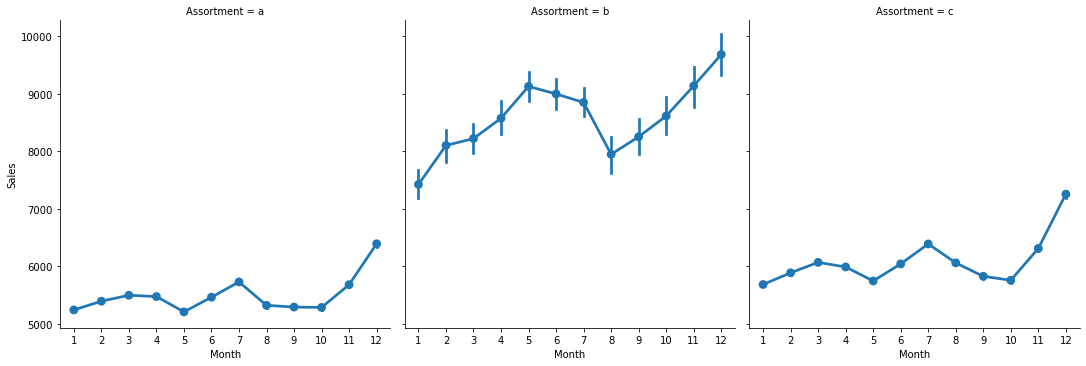

In [ ]:
sns.factorplot(data = train_store, x = 'Month', y = "Sales", estimator=np.mean,
               col = 'Assortment',
               col_order=['a', 'b', 'c']
               ).set_title("Sales across Assortment types")

How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Sales'>

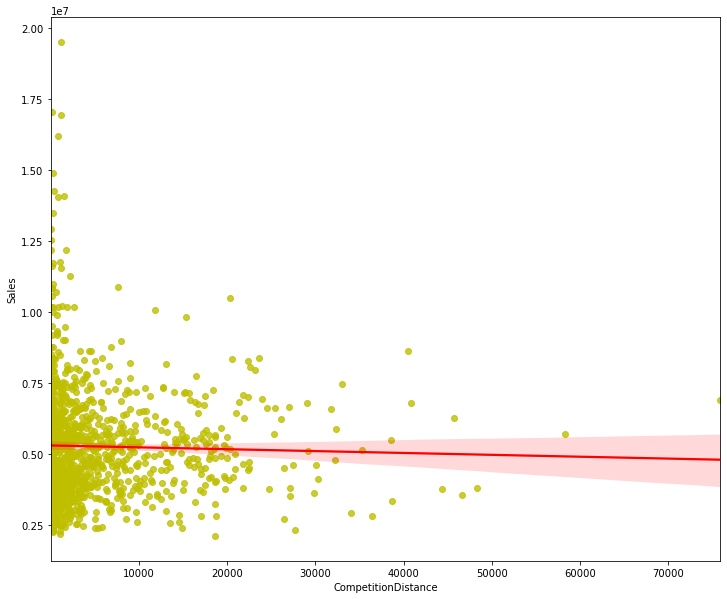

In [ ]:
train_store_agg=train_store.groupby("Store").agg({"Sales":"sum","CompetitionDistance":"mean"})

fig, (axis1) = plt.subplots(1,1,figsize=(12,10))
# sns.scatterplot(data=train_store_agg,x="CompetitionDistance",y="Sales", ax=axis1,color="r",)
sns.regplot(x="CompetitionDistance",y="Sales",data=train_store_agg, color="y",fit_reg=True,line_kws={"color": "red"}) 

How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on has values for competitor distance

In [ ]:
# train_store_comp_agg=train_store.groupby(["Store","CompetitionDistance"], dropna=False,as_index=False).agg({"Sales":"mean"})

# train_store["CompetitionDistance"].size()

# train_store.groupby("Store")[["CompetitionDistance"]].count()

In [ ]:
# train_store_copy=train_store.copy()
# index = train_store_comp_agg['CompetitionDistance'].index[train_store_comp_agg['CompetitionDistance'].apply(np.isnan)]
# train_store_comp_agg["Competetitor"]=True
# train_store_comp_agg.iloc[index]["Competetitor"]=False
# sns.boxplot(x='Competetitor', y='Sales', data=train_store_comp_agg)

In [ ]:
train_store["CompetitionOpenSinceYear"].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

<AxesSubplot:xlabel='ComeptitionBefore', ylabel='Sales'>

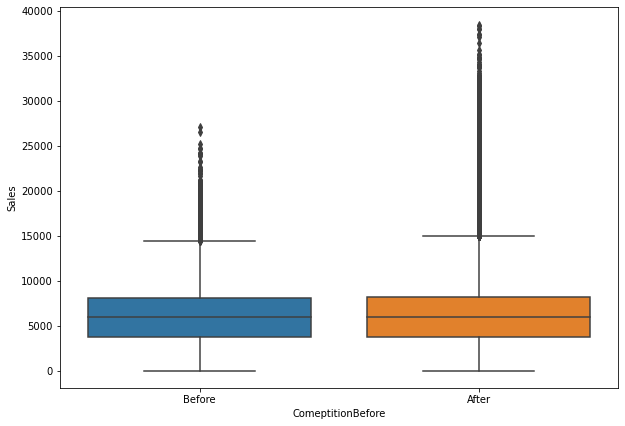

In [ ]:
has_open_competition_df = train_store_copy[train_store_copy['CompetitionOpenSinceMonth'].notnull()]

has_open_competition_df["CompetitionOpenSinceYear"] = has_open_competition_df["CompetitionOpenSinceYear"].astype("int")
has_open_competition_df["CompetitionOpenSinceMonth"] = has_open_competition_df["CompetitionOpenSinceMonth"].astype("int")


sales_before_competition_open = has_open_competition_df[(has_open_competition_df["Year"] < has_open_competition_df["CompetitionOpenSinceYear"]) & (has_open_competition_df["Month"] < has_open_competition_df["CompetitionOpenSinceMonth"]) ]

sales_after_competition_open = has_open_competition_df[(has_open_competition_df["Year"] >= has_open_competition_df["CompetitionOpenSinceYear"]) & (has_open_competition_df["Month"] >= has_open_competition_df["CompetitionOpenSinceMonth"])]

sales_before_competition_open["ComeptitionBefore"]="Before"
sales_after_competition_open["ComeptitionBefore"]="After"

competition_sales_data=pd.concat([sales_before_competition_open,sales_after_competition_open])

plt.figure(figsize=(10, 7))
sns.boxplot(x='ComeptitionBefore', y='Sales', data=competition_sales_data)

In [ ]:
train_store.to_csv("../data/train_store_combined.csv",index=False)

In [ ]:
test_store = pd.merge(test, store, on=["Store"])

In [ ]:
test_store.to_csv("../data/test_store_combined.csv",index=False)